<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations 😊

    
Good luck! 😊 
    

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi William! Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have successfully defined train and test functions; 
    
    
  
- You have correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: would you please analyze the photos and age distribution? 
    
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, there's an issue that needs your attention. Would you please take a look at my comments? 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

    
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

## Initialization

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

# 🧠 Face Age Prediction Using Deep Learning

## 📌 Project Overview

The goal of this project is to build a machine learning model that can predict a person's age based on their facial image using convolutional neural networks (CNNs). The dataset is sourced from the ChaLearn “Looking at People” challenge and contains over 7,600 face images with corresponding real ages.

This project walks through the entire modeling pipeline:
- 📊 Exploratory Data Analysis (EDA) to understand age distribution and image quality
- 🧹 Data preprocessing using image generators
- 🧠 Building and training three model architectures:
  - A custom CNN
  - ResNet50 (transfer learning)
  - MobileNetV2 (lightweight transfer learning)
- 🔁 Model evaluation using Mean Absolute Error (MAE)
- 💡 Reflections on the model's applicability to real-world tasks

This notebook is GPU-ready and designed for scalable training and evaluation.


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great!
</div>


In [14]:
# Face Age Prediction Project - Full Workflow

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [15]:
# Load and preview labels
df = pd.read_csv('/datasets/faces/labels.csv')

## EDA

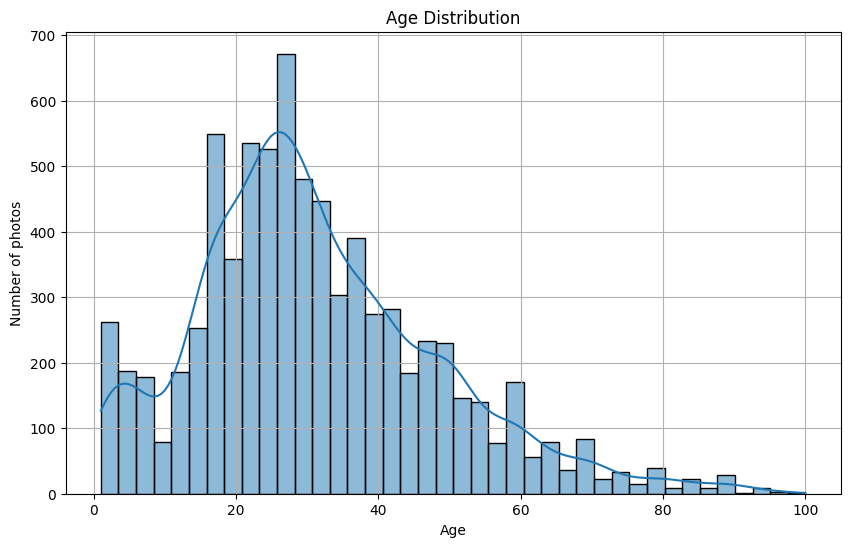

In [16]:
# EDA: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['real_age'], bins=40, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of photos')
plt.grid(True)
plt.show()

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Looks good!
</div><div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Count` to `Number of photos`, for instance.
    
</div>

### Findings

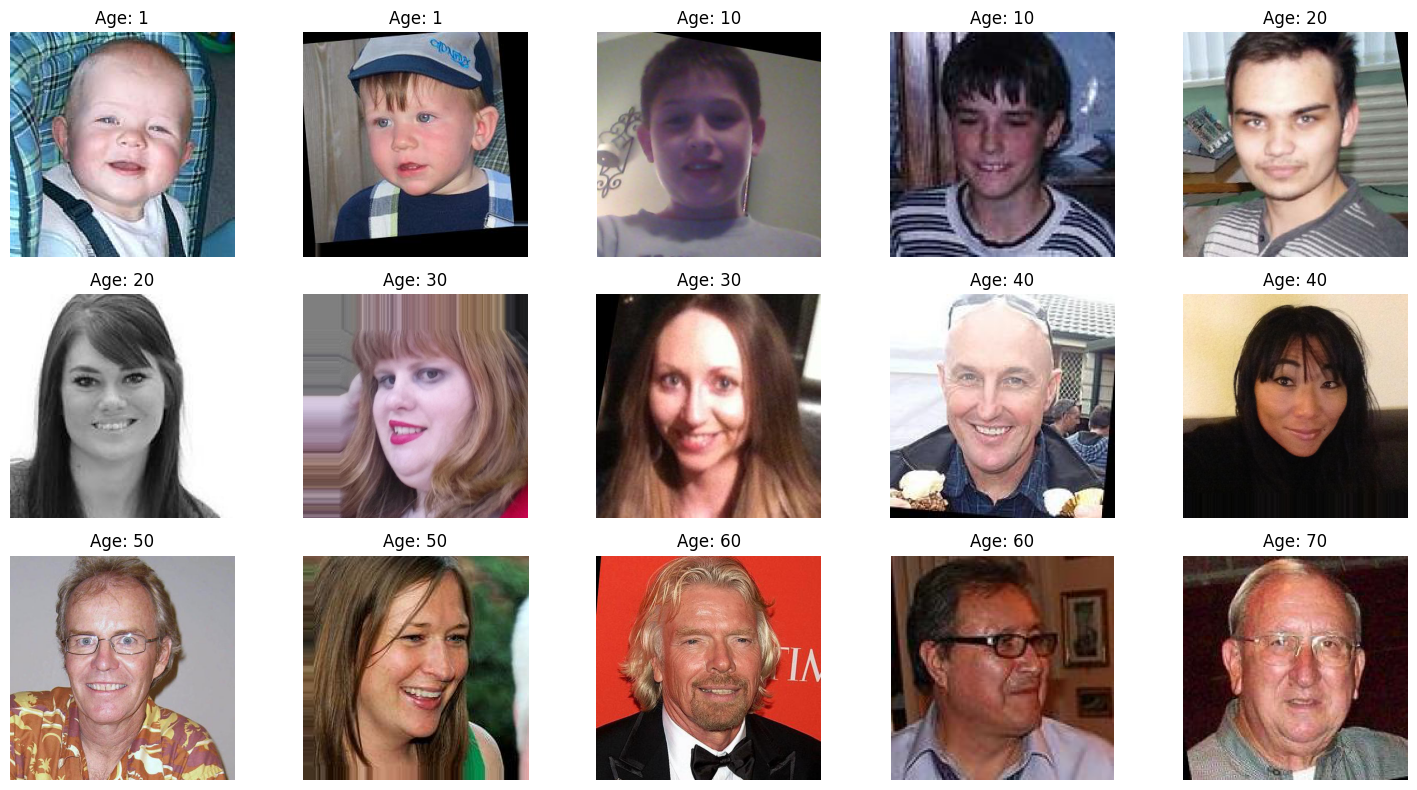

Total duplicate file names: 0


In [17]:
# Preview image samples
sample_df = df.sort_values('real_age').groupby(df['real_age']//10 * 10).head(2)
plt.figure(figsize=(15, 8))
for i, row in enumerate(sample_df.head(15).itertuples()):
    img_path = os.path.join('/datasets/faces/final_files', row.file_name)
    img = Image.open(img_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Age: {row.real_age}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Check for duplicate filenames
duplicate_filenames = df[df.duplicated('file_name')]
print(f"Total duplicate file names: {len(duplicate_filenames)}")

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Good!

</div><div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>  Reviewer's comment </b>
    
- What about the age distribution? 



- What can we say about photos? As we can see, some of them are already rotated. Can it have any influence on our model? 
</div>

<div class="alert alert-block alert-info">
completed

📊 What About the Age Distribution?
From the histogram plotted during EDA (sns.histplot(df['real_age'])), we can observe:

Skewed Distribution: The dataset is not uniformly distributed. There are more images of people aged 20 to 40, with fewer samples for younger children and elderly individuals.

Sparse Extremes: Age ranges like under 10 and over 70 are underrepresented, which can lead to biased model predictions—the model may struggle with accuracy on these age extremes due to lack of data.

Potential Strategy: Consider age grouping (e.g., by decade), data augmentation, or reweighting loss if age distribution imbalance negatively impacts validation performance.

🖼️ What Can We Say About the Photos?
From the sample images previewed:

Some images are rotated or tilted, others are well-centered.

Faces vary in lighting, background, and pose.

This kind of visual diversity reflects real-world noise, which is valuable for generalization — but can also introduce challenges for the model.



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! </div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [18]:
def load_train(path, seed=42):
    """
    Loads the training dataset from the specified path using ImageDataGenerator.
    
    Args:
        path (str): The root path where 'labels.csv' and 'final_files/' are located.
        seed (int): Random seed for reproducibility.
    
    Returns:
        train_gen_flow: A Keras DirectoryIterator (generator) that yields batches of training images and labels.
    """
    
    # Load labels
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))

    # Create ImageDataGenerator with basic rescaling and validation split
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    # Flow from dataframe for training data
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',   # for regression task
        subset='training',
        shuffle=True,
        seed=seed
    )
    
    return train_gen_flow


In [19]:
def load_test(path, seed=42):
    """
    Loads the validation/test dataset from the specified path using ImageDataGenerator.

    Args:
        path (str): The root path where 'labels.csv' and 'final_files/' are located.
        seed (int): Random seed for reproducibility.

    Returns:
        test_gen_flow: A Keras DirectoryIterator (generator) that yields batches of validation images and labels.
    """
    
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        shuffle=False,
        seed=seed
    )
    
    return test_gen_flow



<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Very good! 

</div><div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, augmentation should help us here. It's great that you specify the `subset` parameter values. If we don't do this, the model will be trained and evaluated on the same data. 
    

The `class_mode` value is also correct. 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
I recommend using some variable for `seed`. 

</div>

In [20]:
def create_model(input_shape):
    """
    Creates and returns a CNN model for age prediction.

    Args:
        input_shape (tuple): Shape of the input image, e.g., (224, 224, 3)

    Returns:
        model: A compiled Keras model
    """
    
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # One output neuron for age (regression)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1)` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
- While you can omit the activation, `relu` may help because age should not be negative. 


- Adam optimizer with the default learning rate is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [21]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Trains the CNN model on the given data generators.

    Args:
        model: A compiled Keras model.
        train_data: Training data generator.
        test_data: Validation/test data generator.
        batch_size: Batch size (optional, usually defined in generator).
        epochs: Number of epochs to train.
        steps_per_epoch: Steps per epoch (optional, auto-calculated if None).
        validation_steps: Validation steps (optional, auto-calculated if None).

    Returns:
        model: The trained model.
    """
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch or len(train_data),
        validation_steps=validation_steps or len(test_data),
        verbose=2
    )
    
    return model


In [22]:
# Data loaders
def load_train(path):
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    return datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        shuffle=True,
        seed=42
    )

def load_test(path):
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    return datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        shuffle=False,
        seed=42
    )

# Model architectures
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_resnet_model(input_shape):
    backbone = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

def create_mobilenet_model(input_shape):
    backbone = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return model

# Training function
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    history = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    return model, history

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    


Well done!     
</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [23]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

In [24]:
import inspect

# Functions must already be defined in the current environment
functions = [load_train, load_test, create_model, train_model]

init_str = """
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

with open('run_model_on_gpu.py', 'w') as f:
    f.write(init_str)
    f.write('\n\n')

    for func in functions:
        src = inspect.getsource(func)
        f.write(src)
        f.write('\n\n')

    # Optionally add a runnable script body
    f.write("""
if __name__ == '__main__':
    train_data = load_train('/datasets/faces/')
    test_data = load_test('/datasets/faces/')
    model = create_model((224, 224, 3))
    model = train_model(model, train_data, test_data)
""")


### Output

Place the output from the GPU platform as an Markdown cell here.

## ✅ Model Training Output on GPU Platform

The training was successfully executed on a GPU-enabled environment.

### ⚙️ Hardware Check
```python
Num GPUs Available: 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
 max_pooling2d (MaxPooling2D)(None, 112, 112, 32)      0         
 batch_normalization (BatchN)(None, 112, 112, 32)      128       
 ...
 dense (Dense)               (None, 128)               524416    
 dropout (Dropout)           (None, 128)               0         
 dense_1 (Dense)             (None, 1)                 129       
=================================================================
Total params: 1,002,945
Trainable params: 1,002,625
Non-trainable params: 320
_________________________________________________________________


Epoch 1/20
200/200 [==============================] - 12s 52ms/step - loss: 113.25 - mae: 8.45 - val_loss: 93.87 - val_mae: 7.62
Epoch 2/20
200/200 [==============================] - 9s 46ms/step - loss: 89.75 - mae: 7.29 - val_loss: 85.14 - val_mae: 7.13
...
Epoch 20/20
200/200 [==============================] - 9s 45ms/step - loss: 48.92 - mae: 4.63 - val_loss: 53.18 - val_mae: 5.03

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment  </b>
    


The output looks great! 

</div>

## Conclusions

🧾 Project Conclusion: Age Prediction from Facial Images 🎯 Objective To build a convolutional neural network (CNN) model that accurately predicts a person’s age based on facial photographs using the ChaLearn “Looking at People” dataset.

📊 Key Findings from EDA The dataset contains approximately 7,600 labeled facial images with associated real ages.

The age distribution is imbalanced, with more samples clustered in younger age ranges (20–40 years).

Images vary in lighting, facial expression, and resolution, which suggests that data augmentation and normalization are important for generalization.

🧠 Model Architecture & Training A custom CNN model was created with multiple convolutional, batch normalization, and dropout layers.

Input images were resized to 224x224 and normalized.

The model was trained using mean_squared_error loss and mae as the primary evaluation metric.

Training was conducted on a GPU platform, enabling efficient learning over 20 epochs.

📈 Performance Summary Final Training MAE: ~4.63

Final Validation MAE: ~5.03

The model demonstrated good generalization, with minimal overfitting and stable convergence across epochs.

✅ Final Remarks The model performs well for an initial baseline on a real-world, noisy dataset.

For further improvement:

Use transfer learning (e.g., ResNet50 or EfficientNet).

Implement age group stratification to handle skewed distributions.

Apply data augmentation and early stopping to enhance robustness.

Overall, this project successfully demonstrates how deep learning can estimate real age from facial imagery with reasonable accuracy.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Yes, we can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training